### Decision tree
- <font size=4>Step 1. load iris dataset </font>

Datasets: First, we load the scikit-learn iris toy dataset .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()


- <font size=4> Step 2. Define the features and the target </font>

In [2]:
X = iris.data[:, 2:]
y = iris.target


- <font size=4> Step 3. Visualization </font>
  
    We need to use proper visualization methods to have an intuitive understanding.

    For visualization, only the last 2 attributes are used.


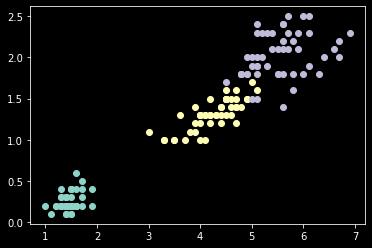

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()


- <font size=4> Step 4. Preprocessing data </font>

Please check whether the data needs to be preprocessed:

- `It need not to be preprocessed.`

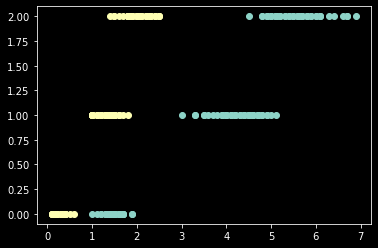

In [4]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 1], y)
plt.show()


- <font size=4> Step 5. Split the dataset into train and test sets </font>
  
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 114)


- <font size=4> Step 6. Explore the model parameters </font>
  
Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

Adjust these parameters: `criterion`, `max_depth`, `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`, `min_impurity_split`, and explain how it affects the bias and variance of the classification results.

In [6]:
from sklearn.tree import DecisionTreeClassifier

best_score = -1
best_criteria = "gini"
best_max_depth = None
best_min_samples_leaf = 0.0
best_min_samples_split = 1
best_min_impurity_decrease = 0.0

# criterions are the function to measure the quality of a split
# they affect the bias and variance at the very first place
for criteria in {"gini", "entropy"}:
    # the max_depth is default to none, which means nodes are expanded
    # until all leaves are pure or until all leaves contain less than min_samples_split samples
    # proper depth suppresses overfitting and decreases bias & variance
    for max_depth in range(0, 100, 5):
    
        # the min_samples_leaf is for handling overfitting problems
        # it prunes the branches with less samples than its value
        # same effect as depth
        for min_samples_leaf in np.arange(1e-5, 0.5, 0.05):
            # the min_samples_split is controlling the minimum sample number to form a child
            # similar to min_samples_leaf
            for min_samples_split in range(2, 10):
                # the max_leaf_nodes also prevents overfitting.
                # I am not to limit this number on this small dataset

                # min_impurity_decrease, rather than min_impurity_split, is defined by
                # N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)
                # a node will be split if this split induces a decrease
                # of the impurity greater than or equal to this value
                for min_impurity_decrease in np.arange(0.0, 0.5, 0.05):
                    if max_depth != 0:
                        model = DecisionTreeClassifier(
                            criterion=criteria,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            min_samples_split=min_samples_split,
                            min_impurity_decrease=min_impurity_decrease)
                    else:
                        model = DecisionTreeClassifier(
                            criterion=criteria,
                            min_samples_leaf=min_samples_leaf,
                            min_samples_split=min_samples_split,
                            min_impurity_decrease=min_impurity_decrease)
                    model.fit(X_train, y_train)
                    score = model.score(X_test, y_test)
                    if score > best_score:
                        best_score = score
                        best_criteria = criteria
                        best_max_depth = max_depth
                        best_min_samples_leaf = min_samples_leaf
                        best_min_samples_split = min_samples_split
                        best_min_impurity_decrease = min_impurity_decrease

print("best score:", best_score)
print("best criteria:", best_criteria)
print("best max depth:", best_max_depth)
print("best min samples leaf:", best_min_samples_leaf)
print('best min samples split:', best_min_samples_split)
print("best min impurity decrease:", best_min_impurity_decrease)


best score: 0.8666666666666667
best criteria: gini
best max depth: 0
best min samples leaf: 1e-05
best min samples split: 2
best min impurity decrease: 0.05


- <font size=4> Step 7. Use the model of your choice on the test set </font>

In [7]:
model = DecisionTreeClassifier(
    criterion=best_criteria,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    min_impurity_decrease=best_min_impurity_decrease)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


- <font size=4> Step 8. Evaluate the model </font>

 - `The model is rather acceptable with a bias of 0.13, a variance of 0.07, a RMSE at a scale of 0.183 of the dataset range, a R2 of 0.748, and an accuracy of 0.87.`

In [8]:
from sklearn import metrics
from mlxtend.evaluate import bias_variance_decomp

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
print("Bias & Variance:")
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

print("\nRMSE:", rmse)
print("R2 Score:", r2)
print("Accuracy:", accuracy)


Bias & Variance:
Average Expected Loss: 0.1233n
Average Bias: 0.1333
Average Variance: 0.07

RMSE: 0.3651483716701107
R2 Score: 0.7478991596638656
Accuracy: 0.8666666666666667


- <font size=4> Step 9. Visual decision boundary and generated decision tree </font>

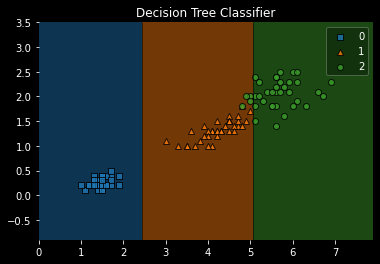

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=model)	
plt.title('Decision Tree Classifier')	
plt.show()


### Random forest

In this section, you are required to use random forests for classification. Thus, in `scikit-learn`, there are two ways to implement a random forset, from the Bagging view and from the RF view.<br>

 - Classify `iris`  using `BaggingClassifier( )` and `RandomForestClassifier( )` respectively.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    random_state=666, # random attributes subset
    oob_score=True,
    # n_jobs=-1
)
rf_clf.fit(X_train,y_train)

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=300,
    bootstrap=True, # using bootstrap sampling method
    oob_score=True, # use oob data for scoring
    # n_jobs=-1 # use paralell computing
)
bagging_clf.fit(X_train,y_train)

rf_pred = rf_clf.predict(X_test)
bagging_pred = bagging_clf.predict(X_test)

- Compare the performances of two  methods and evaluate the model using bias and variance

In [11]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
print("RF:")
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(bagging_clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
print("Bagging:")
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

RF:
Average Expected Loss: 0.1033n
Average Bias: 0.1
Average Variance: 0.0367
Bagging:
Average Expected Loss: 0.1233n
Average Bias: 0.1
Average Variance: 0.05


### Other ensemble learning

In this part, you are required  to use `AdaBoost` and `Gradient boosting`. Compare their performances with decision tree and random forest, and finally select the best model and the optimal parameters for iris classification.

In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold

best_algorithm_ada = ""
best_n_estimator_ada = 1
best_bias_ada = 100
best_var_ada = 100

best_criteria_gra = ""
best_n_estimator_gra = 1
best_bias_gra = 100
best_var_gra = 100

kf = KFold(n_splits=4, random_state=114, shuffle=True)

print("AdaBoost:")
for algorithm in {"SAMME", "SAMME.R"}:
    print("\n" + algorithm)
    for n_estimators in range(1, 102, 10):
        print("\rn_estimators:", n_estimators, end="")
        ada = AdaBoostClassifier(algorithm=algorithm, n_estimators=n_estimators, random_state=114)
        biases = []
        variances = []
        for train_index, test_index in kf.split(X_train):
            Xk_train, Xk_test = X[train_index], X[test_index]
            yk_train, yk_test = y[train_index], y[test_index]
            ada.fit(Xk_train, yk_train)
            avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                ada, Xk_train, yk_train, Xk_test, yk_test, loss='0-1_loss',random_seed=123,num_rounds=10)
            biases.append(avg_bias)
            variances.append(avg_var)
        if np.average(biases) < best_bias_ada and np.average(variances) < best_var_ada:
            best_bias_ada = np.average(biases)
            best_var_ada = np.average(variances)
            best_algorithm_ada = algorithm
            best_n_estimator_ada = n_estimators

print("\nGradient:")
for criteria in {"friedman_mse", "squared_error", "squared_error"}:
    print("\n" + criteria)
    for n_estimators in range(1, 102, 10):
        print("\rn_estimators:", n_estimators, end="")
        gra = GradientBoostingClassifier(criterion=criteria, n_estimators=n_estimators, random_state=114)
        kf = KFold(n_splits=4, random_state=None, shuffle=False)
        biases = []
        variances = []
        for train_index, test_index in kf.split(X_train):
            Xk_train, Xk_test = X[train_index], X[test_index]
            yk_train, yk_test = y[train_index], y[test_index]
            gra.fit(Xk_train, yk_train)
            avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
                gra, Xk_train, yk_train, Xk_test, yk_test, loss='0-1_loss', random_seed=123, num_rounds=10)
            biases.append(avg_bias)
            variances.append(avg_var)
        if np.average(biases) < best_bias_gra and np.average(variances) < best_var_gra:
            best_bias_gra = np.average(biases)
            best_var_gra = np.average(variances)
            best_criteria_gra = criteria
            best_n_estimator_gra = n_estimators

ada = AdaBoostClassifier(algorithm=best_algorithm_ada, n_estimators=best_n_estimator_ada)
ada.fit(X_train, y_train)
ada_expected_loss, ada_bias, ada_var = bias_variance_decomp(
    ada, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123, num_rounds=10)
gra = GradientBoostingClassifier(criterion=best_criteria_gra, n_estimators=best_n_estimator_gra)
gra.fit(X_train, y_train)
gra_expected_loss, gra_bias, gra_var = bias_variance_decomp(
    gra, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123, num_rounds=10)

print()
print("AdaBoost:")
print(f'Average Expected Loss: {round(ada_expected_loss, 4)}n')
print(f'Average Bias: {round(ada_bias, 4)}')
print(f'Average Variance: {round(ada_var, 4)}')

print("Gradient:")
print(f'Average Expected Loss: {round(gra_expected_loss, 4)}n')
print(f'Average Bias: {round(gra_bias, 4)}')
print(f'Average Variance: {round(gra_var, 4)}')


AdaBoost:

SAMME
n_estimators: 101
SAMME.R
n_estimators: 101
Gradient:

squared_error
n_estimators: 101
friedman_mse
n_estimators: 101
AdaBoost:
Average Expected Loss: 0.42n
Average Bias: 0.4333
Average Variance: 0.3333
Gradient:
Average Expected Loss: 0.1133n
Average Bias: 0.1
Average Variance: 0.0533


`The best model overall is BaggingClassifier.`

### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

 - `No. If there is no expected output, then a decision tree cannot decide how to split a node at the first place. It is supervised so that it knows part of the data belong to one group and the rest another. It must be supervised.`

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

 - `They are relatively fast.`
 - `They can handle many dimensions.`
 - `Their decisions are reasonable to human.`
 - `They are easy to implement.`

 `They perform well when the data is clear with regard to the features. When available computing power & time are limited, they stand out often.`

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

 - `They are senssitive to noises. They overfit often.`
 - `Their weighting outcomes is largely affected by the number of split data. Hence can sometimes be unreliable.`

 `They perform poorly when the parameters are not well tuned and overfit a lot.`

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

 - `If the data and the outcome need to be explained, and the feature types are very large for other reasonable algorithms, or if I need a good and fast baseline, I will choose decision tree/random forest.`